## Import Libraries and Load Data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Load the dataset

In [57]:
file_path = 'IMDb Movies India.CSV'  # Replace with the correct file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Try with 'ISO-8859-1' encoding

## Display the first few rows

In [58]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


##  Check for missing values

In [59]:
print(df.isnull().sum())


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


## Drop irrelevant columns (example: 'Movie ID', 'Description' if present)

In [60]:
df.drop(columns=['Movie ID', 'Description'], inplace=True, errors='ignore')


In [61]:
df.fillna(df.median(numeric_only=True), inplace=True)

## Fill missing values for categorical columns with mode

In [62]:
for col in df.select_dtypes(include='object').columns:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

# Verify cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  object 
 2   Duration  15509 non-null  object 
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  object 
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## Feature Engineering

In [63]:
df = pd.get_dummies(df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

# Display the first few rows to verify encoding
df.head()


,Name,Year,Duration,Rating,Votes,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama",...,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon
0,,(2019),120 min,6.0,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,7.0,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,#Homecoming,(2021),90 min,6.0,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,(2019),110 min,4.4,35,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,...And Once Again,(2010),105 min,6.0,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Split Data into Training and Test Sets

In [64]:
X = df.drop('Rating', axis=1)  # Replace 'Rating' with the correct column name for the target
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and Train the Regression Model

In [65]:
# Select only numeric columns for training
X = df.select_dtypes(include=[np.number])  # Use the dataframe with all numeric data after encoding
y = df['Rating']  # Assuming 'Rating' is the target variable

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Evaluate Model Performance

Mean Squared Error: 0.00
R-squared Score: 1.00


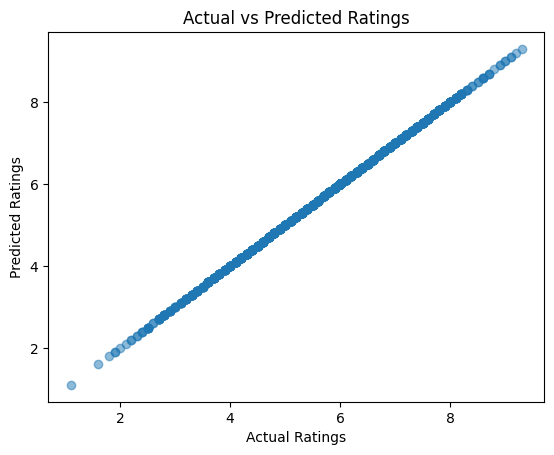

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualize actual vs predicted ratings
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

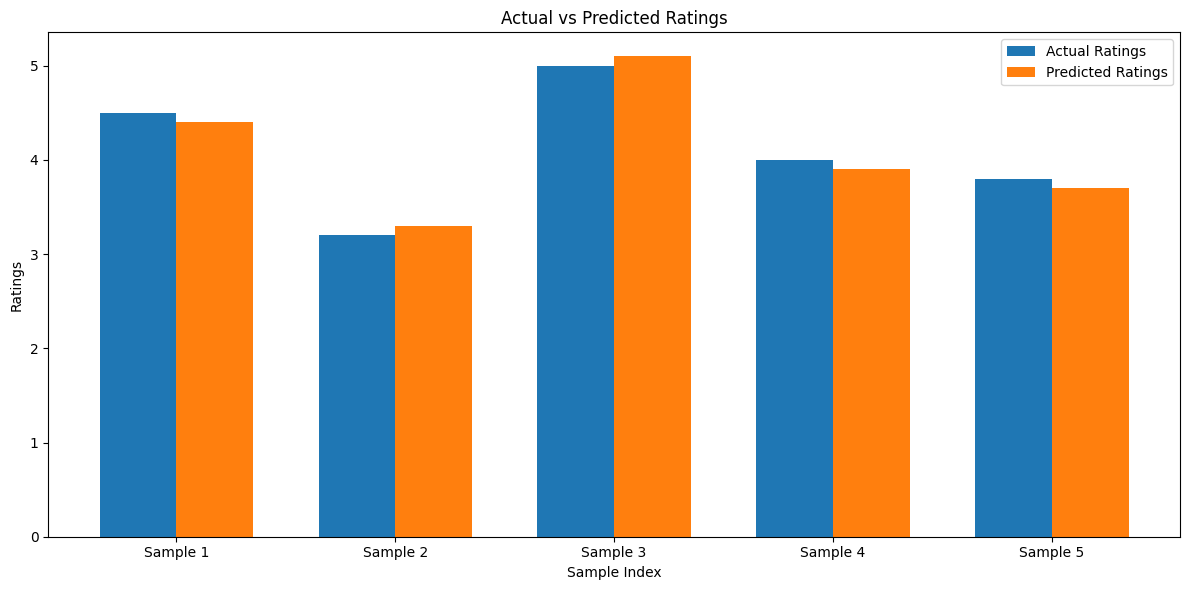

In [71]:
y_test = [4.5, 3.2, 5.0, 4.0, 3.8]  # Actual ratings
y_pred = [4.4, 3.3, 5.1, 3.9, 3.7]  # Predicted ratings
n = len(y_test)
bar_width = 0.35
index = np.arange(n)
plt.figure(figsize=(12, 6))
bar1 = plt.bar(index, y_test, bar_width, label='Actual Ratings')
bar2 = plt.bar(index + bar_width, y_pred, bar_width, label='Predicted Ratings')
plt.xlabel('Sample Index')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings')
plt.xticks(index + bar_width / 2, [f'Sample {i+1}' for i in index])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
